<div style="border:solid Chocolate 2px; padding: 40px">

<b>Кирилл, привет!👋</b>

Меня зовут Арина У., я буду ревьюером твоего проекта. Надеюсь, ты не против, если мы будем общаться на "ты", но если тебя это смущает, обязательно скажи об этом!😏 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение перспективного тарифа компании Мегалайн

**Цель проекта:** определить, какой из двух тарифов "Смарт" или "Ультра" приносит больше денег компании.
  
**Задачи проекта:**
- определить для каждого пользователя в разрезе каждого месяца количество сделанных звонков и использованных минут разговора, написанных сообщений и объём израсходанного интернет-трафика,
- определить помесячную выручку каждого клиента,
- сравнить средние выручки по тарифам,
- определить, отличается ли средняя выручка по Москве от выручки в других регионах.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово, что ты начинаешь проект с подробного описания данных и фиксируешь основную цель проекта, это правильный подход!

## Предобработка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Представлен срез данных по 500 клиентам компании. В представленных датафреймах необходимо изменить тип у столбцов с датой и временем. Также необходимо будет округлить вверх значения минут и мегабайтов, как принято в Мегалайне. При объединение данных (звонки, сообщения и трафик)  появятся пропуски, это может обусловлено тем, что в какой-то момент клиент не писал сообщения или не пользовался интернетом. Данные пропуски необходимо будет заменить нулями.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошо! Ты подробно изучил данные, определил проблемы в них. Давай посмотрим, что у тебя получилось на последующих шагах анализа!

### Замена типов данных

В каждой таблице столбцы с датами привдём к соответствующему формату:

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Типы данных заменены корректно!

Добавим в столбец с указанием месяца для таблиц с параметрами тарифов.

In [9]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

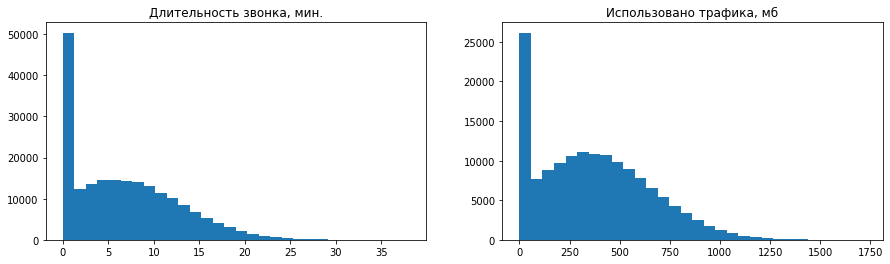

In [10]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0.hist(calls['duration'],bins=30)
ax0.set_title('Длительность звонка, мин.')

ax1.hist(internet['mb_used'],bins=30)
ax1.set_title('Использовано трафика, мб')

plt.show()

In [11]:
calls.query('duration == 0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
month        39613
dtype: int64

In [12]:
internet.query('mb_used == 0').count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
month           19598
dtype: int64

На указанных графиках видно, что имеется большое количество звонков с длительностью 0 минут и интернет-сессий с нулевым трафиком. Округлим значения в этих столбцах вверх до целого значения ~~, заменим 0 на 1.~~

In [13]:
calls['duration'] = np.ceil(calls['duration'])
#calls.loc[calls['duration'] == 0, 'duration'] = 1

internet['mb_used'] = np.ceil(internet['mb_used'])
#internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

In [14]:
#messages[messages.duplicated() == 1].count()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В целом, такая стратегия обработки нулевых значений тоже приемлема. Как еще можно было бы поступить со звонками с нулевой длительностью и с нулевыми интернет-сессиями?
     
на самом деле нулевые звонки и нулевые сессии в интернет не повлияют на анализ, поэтому в целом их можно либо удалить из набора данных, либо сохранить, но отфильтровать на нужных шагах анализа.


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
Твоя логика с округлением нулей до единиц - понятна. Но у тебя также есть и ненулевые значения в колонках mb_used и duration. Согласно условиям оператора, длительность звонков и количествоп отраченных мб округляется, важно это сделать и лучше для решения этой задачи использовать метод `np.ceil()`

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> По твоему совету оставил нули в данных. Переделал код с округлением, чтобы непосредственно применялся метод `np.ceil()`
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, хорошо, вижу твои коррективы!

### Создание сводной таблицы по каждому пользователю

Рассчитаем для каждого пользователя:  
- количество сделанных звонков и израсходованных минут разговора по месяцам;  
- количество отправленных сообщений по месяцам;  
- объем израсходованного интернет-трафика по месяцам.

In [15]:
# сводная таблица по звонкам:

user_calls = calls.merge(users, on='user_id', how='right')
user_calls_pivot = user_calls.pivot_table(values='duration', 
                       index=['user_id', 'month'], 
                       aggfunc=['count','sum'])
user_calls_pivot.columns = ['calls', 'duration']

In [16]:
# сводная таблица для подсчета количества использования трафика:

user_internet = internet.merge(users, on='user_id', how='right')
user_internet_pivot = user_internet.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc='sum')
user_internet_pivot.columns = ['mb_used']

In [17]:
# сводная таблица для подсчета количества отправленных сообщений:

user_messages = messages.merge(users, on='user_id', how='right')
user_messages_pivot = user_messages.pivot_table(values='id', 
                       index=['user_id', 'month'], 
                       aggfunc='count')
user_messages_pivot.columns = ['messages_count']

In [18]:
# объединённая таблица с данными по каждому пользователю

pivots = [user_calls_pivot, user_internet_pivot, user_messages_pivot]
data_grouped = pd.concat(pivots, axis=1)
data_grouped.isna().sum()

calls              40
duration           40
mb_used            11
messages_count    497
dtype: int64

Как видно в сводной таблице есть пропущенные значения, т.к. у нас нет необходимых для заполенния данных, заменим пропущенные значения нулями.

In [19]:
data_grouped.loc[data_grouped['calls'].isna(), 'calls'] = 0
data_grouped.loc[data_grouped['duration'].isna(), 'duration'] = 0
data_grouped.loc[data_grouped['messages_count'].isna(), 'messages_count'] = 0
data_grouped.loc[data_grouped['mb_used'].isna(), 'mb_used'] = 0
data_grouped

calls  duration  mb_used  messages_count
user_id month                                          
1000    5.0     22.0     159.0   2256.0            22.0
        6.0     43.0     172.0  23257.0            60.0
        7.0     47.0     340.0  14016.0            75.0
        8.0     52.0     408.0  14070.0            81.0
        9.0     58.0     466.0  14581.0            57.0
...              ...       ...      ...             ...
1498    10.0    41.0     247.0  20604.0            42.0
1499    9.0      9.0      70.0   1848.0            11.0
        10.0    68.0     449.0  17809.0            48.0
        11.0    74.0     612.0  17984.0            59.0
        12.0    69.0     492.0  13077.0            66.0

[3214 rows x 4 columns]

In [20]:
data_with_tariff = data_grouped.copy()
data_with_tariff.reset_index(inplace=True)
data_with_tariff = data_with_tariff.merge(users, on='user_id', how='outer')
data_grouped_final = data_with_tariff[['user_id','month','calls','duration','mb_used','messages_count','tariff']]
data_grouped_final.head()
#data_grouped_final.set_index(['user_id','month']) - для создания многоуровневого датафрейма

,user_id,month,calls,duration,mb_used,messages_count,tariff
0,1000,5.0,22.0,159.0,2256.0,22.0,ultra
1,1000,6.0,43.0,172.0,23257.0,60.0,ultra
2,1000,7.0,47.0,340.0,14016.0,75.0,ultra
3,1000,8.0,52.0,408.0,14070.0,81.0,ultra
4,1000,9.0,58.0,466.0,14581.0,57.0,ultra


In [21]:
# Проверяем не были ли утрачены данные после объединения таблиц.

#data_grouped_final['user_id'].nunique() == users['user_id'].nunique()
#data_grouped_final['duration'].nunique() == user_calls_pivot['duration'].nunique()
#data_grouped_final['mb_used'].nunique() == user_internet_pivot['mb_used'].nunique()
#data_grouped_final['messages_count'].nunique() == user_messages_pivot['messages_count'].nunique()

Проверка показала, что никакие данные не были утрачена, но появились пустые значения. Удалим пустые строки.

In [22]:
data_grouped_final = data_grouped_final.dropna()
data_grouped_final.isna().sum()

user_id           0
month             0
calls             0
duration          0
mb_used           0
messages_count    0
tariff            0
dtype: int64


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
В целом, ты используешьк орректные методы для объединения. Но не совсем правильно использовать внутренний тип объединения (`how = inner`), корректнее использовать внешнее объединение (`how = outer`). Почему? 
    
Объединение без этого аргумента может привести к потере количества уникальных пользователей. Попробуй проверить себя: посчитай количество уникальных пользователей в объединенной таблице и посмотри на результат. 
    
Как можно проверить объединение? (вообще, советую всегда проводить такие проверки)
    
* Для каждой комбинации месяц-пользователь у нас должна получиться 1 строка. Т.е., если у нас получится более 500*12 = 6000 строк - мы точно где-то ошиблись.
    
* Проверить количество уникальных пользователей - их должно быть 500. (ниже привела пример проверки на твоих данных)
    
* Также можно проверить - совпадают ли количества минут, СМС и Гб из итоговой таблицы и изначальных.
    
Важно объединить таблицы без потерь! Если после проверок окажется, что твои результаты верны, то все хорошо, а если нет, попробуй изменить способ объединения таблиц!

<hr style="border: 2px solid red;" />
<h2> Пример кода от ревьюера: <a class="tocSkip"></h2>

In [23]:
data_grouped_final1 = data_grouped_final.copy()

In [24]:
import numpy as np
data_grouped_final1['user_id'].nunique()

498

<hr style="border: 2px solid red;" />

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Во всех объединениях применил внешнее объединение, провёл проверку, в этот раз все данные на месте. Удалил образовавшиеся пустые строки.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, отлично, теперь объединение проведено более корректно!

### Расчет выручки

In [25]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
# функция для расчёта выручки, полученной с одного клиента c учётом ежемесячного платежа и переплат за превышение 
# базового пакета услуг

def revenue_func(row):
    if row['tariff'] == 'smart':
        duration_delta = row['duration'] - tariffs.loc[0, 'minutes_included']
        mb_used_delta = row['mb_used'] - tariffs.loc[0, 'mb_per_month_included']
        messages_delta = row['messages_count'] - tariffs.loc[0, 'messages_included']
        
        if duration_delta < 0:
            duration_delta = 0
        if mb_used_delta < 0:
            mb_used_delta = 0
        if messages_delta < 0:
            messages_delta = 0
        
        return (tariffs.loc[0, 'rub_monthly_fee'] + tariffs.loc[0, 'rub_per_minute'] * duration_delta + 
                (tariffs.loc[0, 'rub_per_gb'] / 1024) * mb_used_delta + tariffs.loc[0, 'rub_per_message'] * messages_delta) 
    else:
        duration_delta = row['duration'] - tariffs.loc[1, 'minutes_included']
        mb_used_delta = row['mb_used'] - tariffs.loc[1, 'mb_per_month_included']
        messages_delta = row['messages_count'] - tariffs.loc[1, 'messages_included']
        
        if duration_delta < 0:
            duration_delta = 0
        if mb_used_delta < 0:
            mb_used_delta = 0
        if messages_delta < 0:
            messages_delta = 0
        
        return (tariffs.loc[1, 'rub_monthly_fee'] + tariffs.loc[1, 'rub_per_minute'] * duration_delta + 
                (tariffs.loc[1, 'rub_per_gb'] / 1024) * mb_used_delta + tariffs.loc[1, 'rub_per_message'] * messages_delta)

data_final = data_grouped_final.copy()
data_final['revenue'] = data_final.apply(revenue_func, axis=1)
data_final.head(10)

,user_id,month,calls,duration,mb_used,messages_count,tariff,revenue
0,1000,5.0,22.0,159.0,2256.0,22.0,ultra,1950.00000
1,1000,6.0,43.0,172.0,23257.0,60.0,ultra,1950.00000
2,1000,7.0,47.0,340.0,14016.0,75.0,ultra,1950.00000
3,1000,8.0,52.0,408.0,14070.0,81.0,ultra,1950.00000
4,1000,9.0,58.0,466.0,14581.0,57.0,ultra,1950.00000
5,1000,10.0,57.0,350.0,14717.0,73.0,ultra,1950.00000
6,1000,11.0,43.0,338.0,14768.0,58.0,ultra,1950.00000
7,1000,12.0,46.0,333.0,9827.0,70.0,ultra,1950.00000
8,1001,11.0,59.0,430.0,18452.0,0.0,smart,1153.90625
9,1001,12.0,63.0,414.0,14053.0,0.0,smart,550.00000


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Выручка по пользователям подсчитана корректно, у тебя получилась эффективная функция, все получилось!

## Анализ данных

Посчитаем средние значения длительности звонков, количества сообщений и использованных мегабайтов по каждому клиенту в месяц.

In [42]:
data_medians = data_final.pivot_table(index=['user_id', 'tariff'], values=['duration', 'mb_used','messages_count', 'revenue'], aggfunc='median')
data_medians.head()

,,duration,mb_used,messages_count,revenue
user_id,tariff,,,,
1000,ultra,339.0,14325.5,65.0,1950.000000
1001,smart,422.0,16252.5,0.0,851.953125
1002,smart,214.0,17601.0,11.0,987.695312
1003,ultra,824.0,11368.0,83.0,1950.000000
1004,ultra,132.5,17828.5,154.5,1950.000000


Рассчитаем средние значения, диспресию и стандартное отклонение по каждому из тарифов.

In [47]:
data_analysis = data_final.pivot_table(index=['tariff'], values=['duration', 'mb_used','messages_count', 'revenue'],
                                       aggfunc={'duration': [np.median, np.var, np.std], 
                                                'mb_used': [np.median, np.var, np.std], 
                                                'messages_count': [np.median, np.std, np.var],
                                                'revenue': [np.median, np.std, np.var]})
data_analysis

duration                             mb_used                \
         median         std            var   median           std   
tariff                                                              
smart     422.0  190.313730   36219.315784  16531.0   5877.576978   
ultra     518.0  317.606098  100873.633397  19324.0  10096.317202   

                     messages_count                              revenue  \
                 var         median        std          var       median   
tariff                                                                     
smart   3.454591e+07           28.0  28.227876   796.812958   959.898438   
ultra   1.019356e+08           38.0  47.804457  2285.266143  1950.000000   

                                   
               std            var  
tariff                             
smart   787.688141  620452.607534  
ultra   356.305046  126953.285460

In [48]:
data_medians.reset_index(inplace=True)
data_medians

,user_id,tariff,duration,mb_used,messages_count,revenue
0,1000,ultra,339.0,14325.5,65.0,1950.000000
1,1001,smart,422.0,16252.5,0.0,851.953125
2,1002,smart,214.0,17601.0,11.0,987.695312
3,1003,ultra,824.0,11368.0,83.0,1950.000000
4,1004,ultra,132.5,17828.5,154.5,1950.000000
...,...,...,...,...,...,...
493,1495,ultra,954.0,29393.0,82.0,1950.000000
494,1496,smart,524.0,24067.5,41.5,2396.605469
495,1497,smart,490.0,14174.0,17.0,550.000000
496,1498,smart,323.5,21385.0,43.0,1726.757812


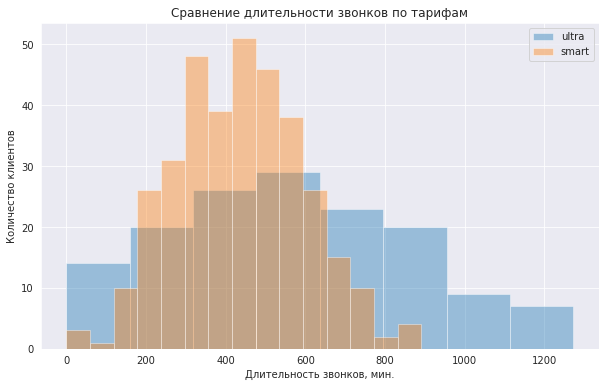

In [80]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data_medians.query('tariff == "ultra"')['duration'], kde=False)
sns.distplot(data_medians.query('tariff == "smart"')['duration'], kde=False)
plt.legend(labels=['ultra','smart'])
ax.set(xlabel="Длительность звонков, мин.", ylabel = "Количество клиентов")
plt.title("Сравнение длительности звонков по тарифам")

plt.show()

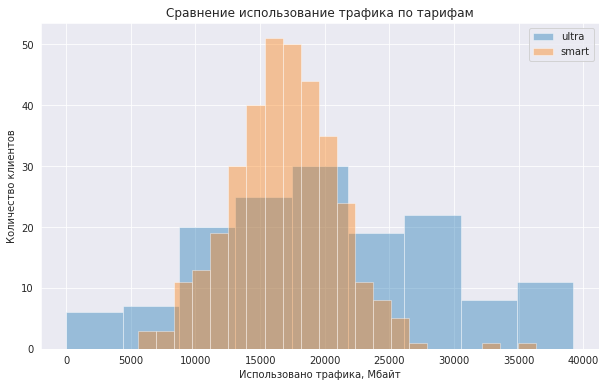

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data_medians.query('tariff == "ultra"')['mb_used'], kde=False)
sns.distplot(data_medians.query('tariff == "smart"')['mb_used'], kde=False)
plt.legend(labels=['ultra','smart'])
ax.set(xlabel="Использовано трафика, Мбайт", ylabel = "Количество клиентов")
plt.title("Сравнение использование трафика по тарифам")

plt.show()

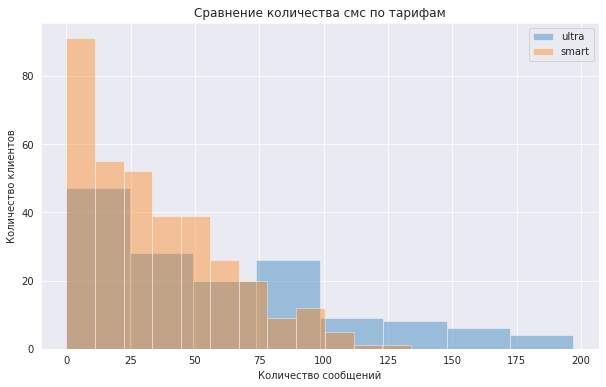

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data_medians.query('tariff == "ultra"')['messages_count'], kde=False)
sns.distplot(data_medians.query('tariff == "smart"')['messages_count'], kde=False)
plt.legend(labels=['ultra','smart'])
ax.set(xlabel="Количество сообщений", ylabel = "Количество клиентов")
plt.title("Сравнение количества смс по тарифам")

plt.show()

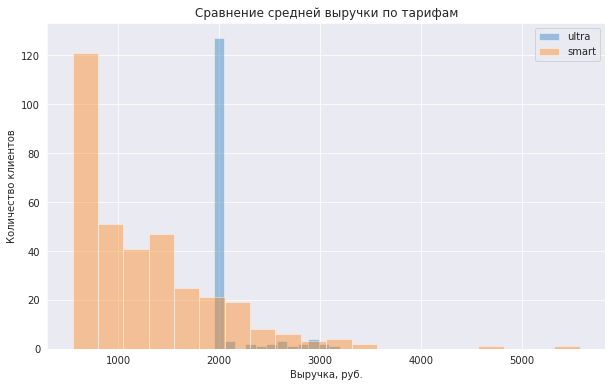

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data_medians.query('tariff == "ultra"')['revenue'], kde=False)
sns.distplot(data_medians.query('tariff == "smart"')['revenue'], kde=False)
plt.legend(labels=['ultra','smart'])
ax.set(xlabel="Выручка, руб.", ylabel = "Количество клиентов")
plt.title("Сравнение средней выручки по тарифам")

plt.show()

In [105]:
ultra_revenue_per_client = data_final.query(
    'tariff == "ultra"')['revenue'].sum() / data_final.query(
    'tariff == "ultra"')['user_id'].nunique()
ultra_revenue_per_client

13713.662307326858

In [106]:
smart_revenue_per_client = data_final.query(
    'tariff == "smart"')['revenue'].sum() / data_final.query(
    'tariff == "smart"')['user_id'].nunique()
smart_revenue_per_client 

7854.674174107143

In [123]:
'Соотношение средней выручки пользователя тарифа "Ультра" к пользователю тарифа "Смарт" составляет: {:.2%}'.format(ultra_revenue_per_client / smart_revenue_per_client)

'Соотношение средней выручки пользователя тарифа "Ультра" к пользователю тарифа "Смарт" составляет: 174.59%'

Графики для тарифа "Смарт" ближе к нормальному распределению. Дисперсия у "Смарта" меньше, чем у "Ультра" по всем показателям кроме выручки, по которой наблюдается обратная ситуация.
Это может говорить о том, что у клиентов тарифа "Смарт" меньшая вариативность, поскольку пакет услуг в этом тарифе ограничен сильнее, чем для тарифа "Ультра". В то же время, у клиентов тарифа "Ультра" больше возможностей по использованию предоставляемых услуг, что вызывает увеличение дисперсии в рассматриваемой выборке. При этом высокая стоимость тарифа "Ультра" способствует уменьшению дисперсии, т.к. поведение клиентов может сильно отличаться в рамках дорого тарифа без дополнительных расходов с их стороны.  
Выручка по клиентам тарифа "Ультра" в основном формируется за счёт ежемесячных платежей, у клиентов с тарифом "Смарт" платежи более разнообразны.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В целом, есть рекомендации по оформлению визуализации: если ты используешь визуализацию в проекте, важно добавлять названия осей и заголовки ко всем графикам на русском языке (т.е. не использовать названия колонок, а фиксировать свои названия), кроме того важно убирать технические строчки типа `<matplotlib.axes._subplots.AxesSubplot at 0x7fc3d1b2fb50>` это можно сделать с помощью метода `plt.show()`. Пожалуйста, постарайся доработать всю визуализацию в твоем проекте.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
По аналогии с анализом звонков, смс и использованного трафика, важно проанализировать выручку.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделал графики более читаемыми, сравнил тарифы по выручке.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, отлично, теперь визуализация выглядит максимально информативно, здорово, что получилось добавить анализ выручки!

## Построение гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза H₀: Средняя выручка тарифа "Ультра" равна средней выручке тарифа "Смарт".  
  
Альтернативная гипотеза H₁: Средняя выручка тарифа "Ультра" и средняя выручка тарифа "Смарт" различаются.  
  
Уровень значимости: α=5%

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
нулевая и альтернативная гипотезы сформулированы верно, так держать!

In [33]:
ultra = data_final.query('tariff == "ultra"')['revenue']
smart = data_final.query('tariff == "smart"')['revenue']
alpha = 0.05 

results = st.ttest_ind(ultra, smart) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


In [126]:
data_final.pivot_table(index='tariff',values='revenue',aggfunc='median')

,revenue
tariff,
smart,959.898438
ultra,1950.000000


Средние значения выручки по тарифам различаются в 2 раза. При стоимости тарифа "Смарт" в 550 рублей, в среднем с каждого клиента компания получает ещё по 410 рублей выручки. Эта может быть обусловлено ограниченым набором услуг по тарифу.

Вероятность того, что средняя выручка тарифов различается случайно - менее 1%. С уверенностью 95% может сказать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Cредняя выручка пользователей из Москвы отличается от выручки по другим регионам

Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
  
Альтернативная гипотеза H₁: Средняя выручка пользователей из Москвы и пользователей из других регионов различается.
  
Уровень значимости: α=5%  

In [35]:
data_final_region = data_final.merge(users, on=['user_id','tariff'], how='inner')
moscow = data_final_region.query('city == "Москва"')['revenue']
regions = data_final_region.query('city != "Москва"')['revenue']

alpha = 0.05 

results = st.ttest_ind(moscow, regions)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


In [36]:
def region(city):
    if city == 'Москва':
        return 'Москва'
    else:
        return 'Другой регион'
data_final_region['region'] = data_final_region['city'].apply(region)
data_final_region.pivot_table(index='region',values='revenue',aggfunc='mean')

,revenue
region,
Другой регион,1482.063727
Москва,1507.276762


Гипотезу о том, что средняя выручка по клиентам в Москве равна средней выручке по клиентам в других регионах, не удалось отвергнуть. Уровень значимости нулевой гипотезы сотавляет 52%

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
В целом, тестирование гипотез произведено корректно!

## Вывод

Средняя выручка пользователей из Москвы практически не отличается от выручки пользователей из других регионов. Разница составляет 22 рубля. 
  
По результатам проведённого анализа можно сделать вывод, тариф «Ультра» приносит в среднем больше выручки, чем тариф «Смарт»: `1950` и `960` рублей соответственно.    
Cтоит отметить, что тариф "Смарт" более маржинальный по сравнению с "Ультра": выручка от дополнительных пакетов услуг в среднем на `174%` больше, чем абонентская плата.
Не смотря на то что анализ показал, что тариф "Смарт" имеет большую долю по выручке и активнее приносит дополнительный доход, считаю целесообразным направить усилия на привлечение клиентов по тарифу "Ультра". Средняя выручка одного клиента по тарифу ультра на 174% выше, чем по тарифу "Смарт". Клиенты зачастую не используют весь пакет услуг в рамках месяца, что также способствует снижению затрат компании.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Кирилл, в итоговом выводе обязательно должна найти свое отражение цель исследования - нужно определить выгодный тарифный план для сотового оператора.  Пока твой итоговый вывод представляет собой подитог твоих действий с данными. Стоит расширить вывод, но помни о том, что свою позицию надо подкрепить аргументами.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вывод немного расширил, надеюсь, логика меня не подвела 😉

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, отлично, теперь вывод больше ориентирован на заказчика и в целом отвечает на основной вопрос исследования, ты молодец, все получилось!

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Кирилл, спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, многие задачи в рамках проекта тебе удалось успешно решить, отличная работа! Однако, есть несколько важных моментов, которые стоит доработать, подсказки ты найдешь в моих комментариях!

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагал очень интересные, решения и методы для их реализации. Хорошая работа! 
* Ты активно работал с визуализацией, хорошо, что ты не избегаешь этого инструмента для анализа!
* Ты использовал разные методы для работы с данными, круто, что ты владеешь ими и можешь применять на практике.
    
**На что стоит обратить внимание:🙂**:
* Стоит поработать над оформлением графиков в проекте.
* Обрати внимание на объединение таблиц, также важно округлить значения звонков и интернет-сессий с помощью np.ceil()/
* Важно попробовать расширить итоговый вывод!

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/l3vR76o4wmQ4aIrV6/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту: вторая итерация ревью**

Кирилл, спасибо, что прислал проект с доработками! И отдельное спасибо за обратную связь😊 Тебе удалось значительно улучшить проект, спасибо за терпение и желание довести проект до конца, у тебя все отлично получается, дальше - больше и лучше!
Спешу тебе сообщить, что твой проект принят, и ты можешь перейти на следующий спринт!

**Желаю тебе крутых и интересных проектов на следующих спринтах**😉
![gif](https://media.giphy.com/media/l49JHz7kJvl6MCj3G/giphy.gif)